In [5]:
# binomial single 
# prob of event
# binomial summation (tails)

In [33]:
# explain what discrete means

In [2]:
import math
from scipy.special import comb
from scipy.stats import binom
# add matplotlib

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-whitegrid') # add seaborn?

**Scipy** has a module called [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) that has a binomial distribution function under the header **Discrete Distributions**

[Scipy.special](https://docs.scipy.org/doc/scipy/reference/special.html)

[Scipy.stats Docs](https://docs.scipy.org/doc/scipy/reference/stats.html) 

In [4]:
numbers = [0,1,2,3,4,5,6,7]

for item in numbers:
    print(f"{item}! = {math.factorial(item):,}")

0! = 1
1! = 1
2! = 2
3! = 6
4! = 24
5! = 120
6! = 720
7! = 5,040


On **page 37** of this chapter, we're introduced to **combinatorics** or *"advanced counting"*.

This is commonly presented in the form ***INSERT LATEX***

Which reads "*n choose k*". What this expresses is the number of k combinations in n items.In R, this is the choose() function.

**Scipy.special** has a similar method called **comb** that does the same thing.

In [14]:
comb(N=3,k=2,exact=True) # exact=True returns an integer, exact=False float

3

**Scipy.stats** uses [**binom.pmf**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom) to calculate the binomial *probability mass function*.

On **page 39** is the example:

> *We could calculate the probability of flipping exactly 12 heads in 24 coin tosses.*

binom.pmf(k,n,p)

k = 12
n = 24
p = 0.5

In [45]:
probability = binom.pmf(12,24,0.5)

round(probability,4) # round returns an integer to four decimal places

0.1612

In [48]:
nums = list(range(0,24+1))
probs = [binom.pmf(n,24,0.5) for n in nums]

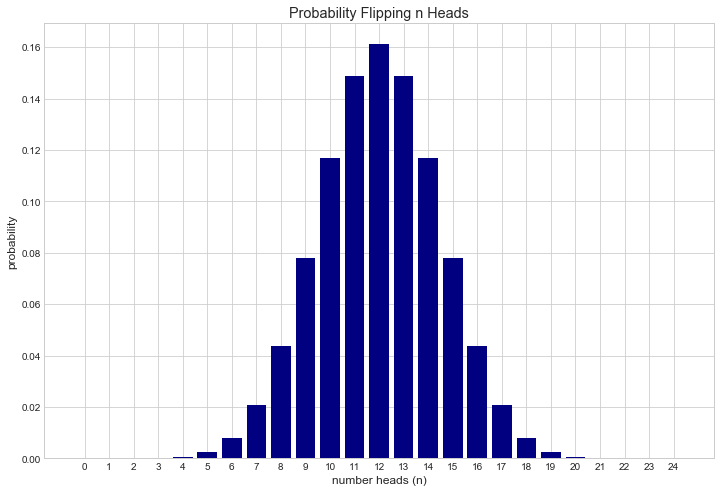

In [87]:
plt.figure(figsize=(12,8))
plt.title("Probability Flipping n Heads")

plt.xlabel("number heads (n)")
plt.ylabel('probability')

plt.bar(left=nums,height=probs,tick_label=nums,color="navy",);

In [34]:
# compare to the function I created
binomial_pmf(1,6,0.3)

0.30253

In [42]:
binom.cdf(5,6,0.3) # what does loc mean

0.999271

### Summary of Python used:

combinations: comb(N,k,exact=True)

binomial probability mass function: binom.pmf(k,n,p)

binomial cumulative density function: binom.cdf(k,n,p)

### Questions